<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

37/37 [==============================] - 0s 5ms/step - loss: 1.1216 - accuracy: 0.5085 - val_loss: 0.5526 - val_accuracy: 0.8209
Epoch 3/20
37/37 [==============================] - 0s 5ms/step - loss: 0.9089 - accuracy: 0.5907 - val_loss: 0.5115 - val_accuracy: 0.8277
Epoch 4/20
37/37 [==============================] - 0s 4ms/step - loss: 0.8454 - accuracy: 0.6271 - val_loss: 0.4734 - val_accuracy: 0.8378
Epoch 5/20
37/37 [==============================] - 0s 5ms/step - loss: 0.7742 - accuracy: 0.6525 - val_loss: 0.4384 - val_accuracy: 0.8514
Epoch 6/20
37/37 [==============================] - 0s 5ms/step - loss: 0.7712 - accuracy: 0.6712 - val_loss: 0.4092 - val_accuracy: 0.8750
Epoch 7/20
37/37 [==============================] - 0s 5ms/step - loss: 0.7509 - accuracy: 0.6712 - val_loss: 0.3811 - val_accuracy: 0.8851
Epoch 8/20
37/37 [==============================] - 0s 5ms/step - loss: 0.6382 - accuracy: 0.7203 - val_loss: 0.3585 - val_accuracy: 0.8885
Epoch 9/20
37/37 [=============

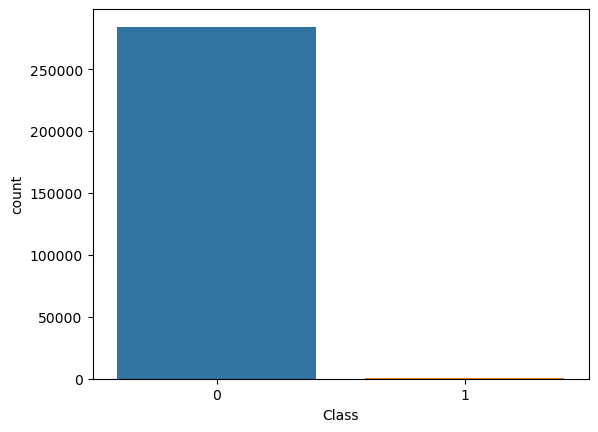

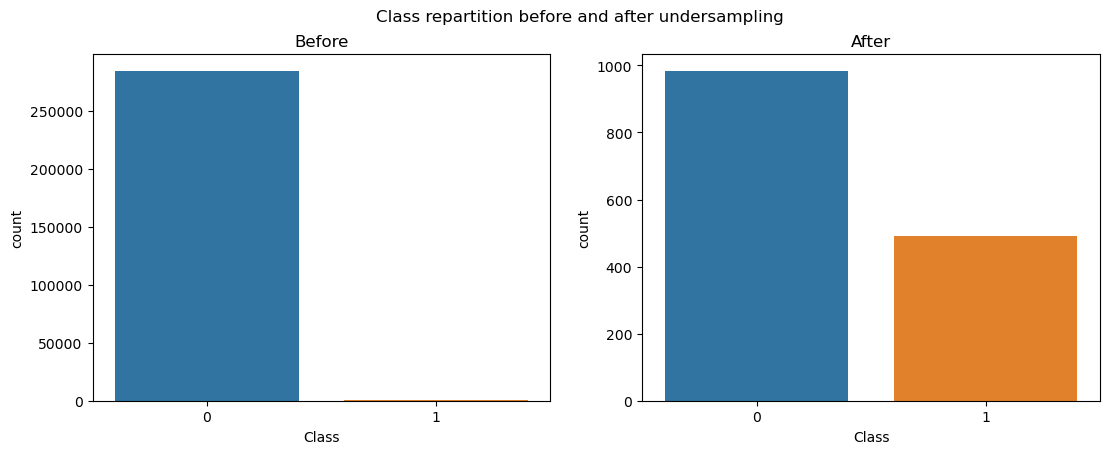

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization,Dropout,Dense,Flatten,Conv1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adagrad
credit_df = pd.read_csv(r"/Users/girish/Data science/creditcard.csv") 
credit_df.head(5)
credit_df.info() 
credit_df.describe()
from sklearn import preprocessing 
scaler = preprocessing.StandardScaler() 
#standard scaling
credit_df['std_Amount']= scaler.fit_transform(credit_df['Amount'].values.reshape (-1,1))
#removing Amount
credit_df = credit_df.drop("Amount", axis=1)
sns.countplot(x="Class", data=credit_df)
import imblearn
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=0.5) 
cols = credit_df.columns.tolist()
cols = [c for c in cols if c not in ["Class"]]
target = "Class"
#define X and Y
X = credit_df[cols]
Y = credit_df[target]
#undersample
X_under, Y_under = undersample.fit_resample(X, Y) 
from pandas import DataFrame
test = pd.DataFrame(Y_under, columns = ['Class'])
#visualizing undersampling results
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5)) 
sns.countplot(x="Class", data=credit_df, ax=axs[0]) 
sns.countplot(x="Class", data=test, ax=axs[1])
fig.suptitle("Class repartition before and after undersampling") 
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1] 
a2.set_title("After")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_under, Y_under, test_size=0.2, random_state=1)
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1) 
X_test=X_test.values.reshape(X_test.shape[0],X_test.shape[1],1)
model=Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization()) 
model.add(Dropout(0.2))
model.add(Conv1D(64,2,activation='relu')) 
model.add(BatchNormalization()) 
model.add(Dropout(0.5))
model.add(Flatten()) 
model.add(Dense(64,activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))
                                                                                       
model2=Sequential() 
model2.add(Conv1D(32,2,activation='relu',input_shape=X_train[0].shape)) 
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Conv1D(64,2,activation='relu')) 
model2.add(BatchNormalization()) 
model2.add(Dropout(0.5))
model2.add(Flatten()) 
model2.add(Dense(64,activation='relu')) 
model2.add(Dropout(0.5))
model2.add(Dense(1,activation='sigmoid'))
model2.summary() 
model2.compile(optimizer=SGD(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])
history2 = model2.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))
          
def plotLearningCurve(history,epochs):
    epochRange = range(1,epochs+1)
    plt.plot(epochRange,history.history['accuracy']) 
    plt.plot(epochRange,history2.history['accuracy']) 
    plt.plot(epochRange,history.history['val_accuracy']) 
    plt.plot(epochRange,history2.history['val_accuracy']) 
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy') 
    plt.legend(['Train1','Train2','Validation1','Validation2'],loc='upper left')
    plt.show()
    plt.plot(epochRange,history.history['loss']) 
    plt.plot(epochRange,history2.history['loss']) 
    plt.plot(epochRange,history.history['val_loss']) 
    plt.plot(epochRange,history2.history['val_loss']) 
    plt.title('Model Loss')
    plt.xlabel('Epoch') 
    plt.ylabel('Loss')
    plt.legend(['Train1', 'Tain2','Validation1', 'Validation2'],loc='upper left') 
    plt.show()
    model3=Sequential()
    model3.add(Conv1D(32,2,activation='relu',input_shape=X_train[0].shape))
    model3.add(BatchNormalization()) 
    model3.add(Dropout(0.2))
    model3.add(Conv1D(64,2,activation='relu')) 
    model3.add(BatchNormalization()) 
    model3.add(Dropout(0.5))
    model3.add(Flatten()) 
    model3.add(Dense(64,activation='relu')) 
    model3.add(Dropout(0.5))
    model3.add(Dense(1,activation='sigmoid'))
    model3.summary()
    model3.compile(optimizer=Adagrad(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])
    history3 = model3.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))
          
def plotLearningCurve(history,epochs):
    epochRange = range(1,epochs+1)
    plt.plot(epochRange,history.history['accuracy'])
    plt.plot(epochRange,history2.history['accuracy']) 
    plt.plot(epochRange,history3.history['accuracy']) 
    plt.plot(epochRange,history.history['val_accuracy']) 
    plt.plot(epochRange,history2.history['val_accuracy']) 
    plt.plot(epochRange,history3.history['val_accuracy']) 
    plt.title('Model Accuracy')
    plt.xlabel('Epoch') 
    plt.ylabel('Accuracy')
    plt.legend(['Train_adam','Train_sgd','Train_adagrad','Validation_adam','Validation_sgd','Validation_adagrad'],loc='botom right')
    plt.show()
    plt.plot(epochRange,history.history['loss']) 
    plt.plot(epochRange,history2.history['loss']) 
    plt.plot(epochRange,history3.history['loss']) 
    plt.plot(epochRange,history.history['val_loss']) 
    plt.plot(epochRange,history2.history['val_loss']) 
    plt.plot(epochRange,history3.history['val_loss']) 
    plt.title('Model Loss')
    plt.xlabel('Epoch') 
    plt.ylabel('Loss')
    plt.legend(['Train_adam','Train_sgd','Train_adagrad','Validation_adam','Validation_sgd','Validation_adagrad'],loc='upper right')
    plt.show() 
    plotLearningCurve(history,20)

